# Práctica 2 - Parte 4: Robot móvil en el plano

En esta parte de la práctica se estudiará el modelo cinemático de un robot móvil de tipo diferencial. El objetivo es representar la evolución de su trayectoria en el plano XY, mostrar su orientación con una flecha y diseñar una ley de control para alcanzar un objetivo (goal).

---

## Enunciado general

1. Implementa en Python el modelo cinemático de un robot móvil en el plano:
   $
   \dot{x} = v \cos \theta, \quad
   \dot{y} = v \sin \theta, \quad
   \dot{\theta} = \omega
   $
   donde $u(t) = (v, \omega)$ son las entradas de control (velocidad lineal y angular).

2. Simula la evolución del robot para una entrada constante $u(t)$, de modo que la trayectoria sea circular.

3. Representa gráficamente la posición $(x,y)$ del robot en el plano y su orientación con una flecha. Añade también un punto de color distinto que represente el objetivo (goal) en el plano.

4. Implementa una ley de control para llevar al robot a una pose deseada $(x_d, y_d, \theta_d)$ y verifica el resultado.

5. Repite el proceso para distintos objetivos y compara los resultados.

---


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import ipywidgets as widgets

## Ejercicio 1

Simula el modelo del robot móvil con entradas constantes $v$ y $\omega$ y representa su trayectoria en el plano XY.
Muestra también su orientación con una flecha y dibuja un objetivo (goal) en el plano, que se pueda modificar de manera interactiva.

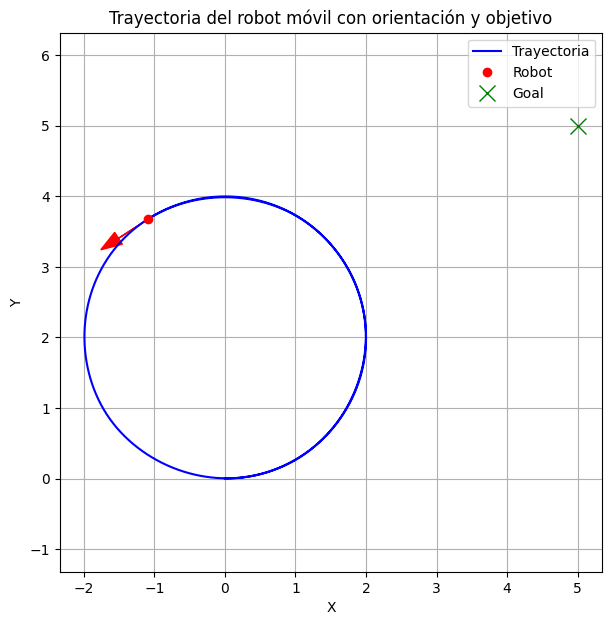

In [2]:
# Modelo del robot móvil
def robot_model(t, state, v, omega):
    x, y, theta = state
    dxdt = v * np.cos(theta)
    dydt = v * np.sin(theta)
    dthetadt = omega
    return [dxdt, dydt, dthetadt]

# Parámetros iniciales
state0 = [0, 0, 0]  # (x0, y0, theta0)
t_span = (0, 20)
t_eval = np.linspace(t_span[0], t_span[1], 500)

# Entradas constantes para movimiento circular
v = 1.0
omega = 0.5

# Simulación
sol = solve_ivp(robot_model, t_span, state0, t_eval=t_eval, args=(v, omega))

# Función de representación con goal
def plot_robot_with_goal(x, y, theta, goal=(5,5)):
    plt.figure(figsize=(7,7))
    plt.plot(sol.y[0], sol.y[1], 'b-', label="Trayectoria")
    plt.plot(x, y, 'ro', label="Robot")
    plt.arrow(x, y, 0.5*np.cos(theta), 0.5*np.sin(theta), head_width=0.2, color='r')
    plt.plot(goal[0], goal[1], 'gx', markersize=12, label="Goal")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Trayectoria del robot móvil con orientación y objetivo")
    plt.legend()
    plt.axis("equal")
    plt.grid(True)
    plt.show()

# Ejemplo de visualización con goal (5,5)
plot_robot_with_goal(sol.y[0][-1], sol.y[1][-1], sol.y[2][-1], goal=(5,5))

## Ejercicio 2

Implementa una **ley de control** que lleve al robot desde su estado inicial $x(0) = (0,0,0)$ hasta una pose deseada $goal = (x_d, y_d, \theta_d)$.
Simula el comportamiento y representa gráficamente los resultados como en el ejemplo anterior. Incluye interacción con $(x_d, y_d, \theta_d)$.

## Preguntas de reflexión

1. ¿Qué diferencias se observan entre el movimiento circular con $u=(v,\omega)$ constante y el movimiento con ley de control?
2. ¿Cómo influye la elección de las ganancias en la ley de control ($k_\rho, k_\alpha, k_\beta$) en el comportamiento del robot?
3. ¿Por qué cambia la trayectoria si solamente modificamos $\theta_d$?
4. ¿Qué ocurre si el objetivo (goal) se sitúa muy lejos? ¿Y si está muy cerca?
5. ¿Cómo se relaciona este ejemplo con los conceptos de controlabilidad y estabilidad vistos en teoría?
